In [1]:
from statsmodels.api import formula as sm

In [2]:
co = pd.read_pickle('./data/NR1_ablation_season_data.pcl'); print len(co)
ca = pd.read_pickle('./data/p301_ablation_season_data.pcl'); print len(ca)
nm = pd.read_pickle('./data/Vcm_ablation_season_data.pcl'); print len(nm)

1304
77
33


In [3]:
ca.snowmelt *= 1000.
nm.snowmelt *= 1000.

In [4]:
m_co = sm.ols('snowmelt ~ DOWY - 1', co).fit()
m_ca = sm.ols('snowmelt ~ DOWY - 1', ca).fit()
m_nm = sm.ols('snowmelt ~ DOWY - 1', nm).fit()

In [5]:
m_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               snowmelt   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     1596.
Date:                Wed, 28 Jun 2017   Prob (F-statistic):          1.61e-228
Time:                        10:33:18   Log-Likelihood:                -4879.0
No. Observations:                1304   AIC:                             9760.
Df Residuals:                    1303   BIC:                             9765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
DOWY           0.0514      0.001     39.950      0.000         0.049     0.054
==============================================================================
Omnibus:                      247.644   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.026
Skew:                           1.201   Prob(JB):                     5.09e-93
Kurtosis:                       4.432   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
m_ca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               snowmelt   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     52.40
Date:                Wed, 28 Jun 2017   Prob (F-statistic):           3.11e-10
Time:                        10:33:27   Log-Likelihood:                -316.29
No. Observations:                  77   AIC:                             634.6
Df Residuals:                      76   BIC:                             636.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
DOWY           0.0684      0.009      7.239      0.000         0.050     0.087
==============================================================================
Omnibus:                       53.401   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.720
Skew:                           2.348   Prob(JB):                     5.15e-38
Kurtosis:                       8.610   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
m_nm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               snowmelt   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     25.68
Date:                Wed, 28 Jun 2017   Prob (F-statistic):           1.63e-05
Time:                        10:33:49   Log-Likelihood:                -97.458
No. Observations:                  33   AIC:                             196.9
Df Residuals:                      32   BIC:                             198.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
DOWY           0.0231      0.005      5.068      0.000         0.014     0.032
==============================================================================
Omnibus:                       15.434   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.412
Skew:                           1.516   Prob(JB):                     0.000273
Kurtosis:                       4.657   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
co.head()

,DOAS,date,snowmelt,DOWY,DOWY2
0,1,1981-04-09,15.0,191,36481
1,2,1981-04-10,3.0,192,36864
2,3,1981-04-11,12.0,193,37249
3,4,1981-04-12,11.0,194,37636
4,5,1981-04-13,0.0,195,38025


In [82]:
mod.params['DOWY']

0.023102219124214889

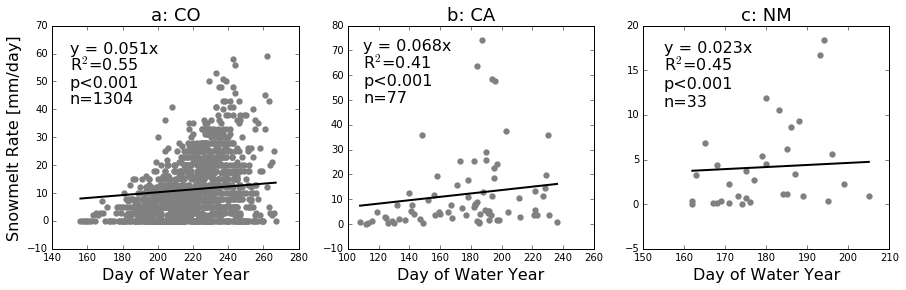

In [109]:
f,axes = plt.subplots(nrows=1,ncols=3)
fig = plt.gcf()
fig.set_figwidth(15)

titles = ['a: CO','b: CA','c: NM']
textx = [150,110,155]
texty = [60,70,17]
texty2= [54,63,15]
texty3= [48,56,13]
texty4 = [42,49,11]

for ax,mod,dat,x,y,y2,y3,y4,title in zip(axes,[m_co,m_ca,m_nm],[co,ca,nm],textx,texty,texty2,texty3,texty4,titles):
    plt.sca(ax)
    plt.scatter(dat.DOWY,dat.snowmelt,s=40,c='0.5',lw=0,edgecolors='k')
    xmin = dat.DOWY.min()
    xmax = dat.DOWY.max()
    
    ymin = mod.params['DOWY'] * xmin
    ymax = mod.params['DOWY'] * xmax
    
    plt.plot((xmin,xmax),(ymin,ymax), lw=2, c='k')
    
    plt.text(x,y,'y = %sx'%(round(mod.params['DOWY'],3)), fontsize=16)
    plt.text(x,y2,'R$^2$=%s'%(round(mod.rsquared,2)), fontsize = 16)
    plt.text(x,y3, 'p<0.001', fontsize=16)
    plt.text(x,y4, 'n=%s'%(len(dat)), fontsize=16)
    
    plt.title(title,fontsize=18)
    plt.xlabel('Day of Water Year', fontsize=16)

plt.sca(axes[0])
plt.ylabel('Snowmelt Rate [mm/day]', fontsize=16)

plt.savefig('./figures/snowmelt_rate_dowy.png',dpi=300,bbox_inches='tight')
plt.savefig('./figures/snowmelt_rate_dowy.pdf')